<a href="https://colab.research.google.com/github/WilkinsKimori/UEL-CN-7000-46613/blob/main/Full_Code_Running.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the data into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv')

# Get the number of records
n_records = df.shape[0]

# Get the number of people with depression
n_depressed = df['depressed'].value_counts()[1]

# Print the number of records, number of people with depression, and percentage of people with depression
print("Total number of records: {}".format(n_records))
print("Total number of people depressed: {}".format(n_depressed))
print("Percentage of people with depression: {:.2f}%".format(100*n_depressed/n_records))


Total number of records: 1143
Total number of people depressed: 193
Percentage of people with depression: 16.89%


In [ ]:
import pandas as pd

# Read the train data into a Pandas DataFrame
train_df_full = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv')

# Check for missing values
print(train_df_full.isnull().sum())  # This will print the number of missing values for each column


surveyid              0
village               0
femaleres             0
age                   0
married               0
                     ..
saved_mpesa           0
amount_saved_mpesa    0
early_survey          0
depressed             0
day_of_week           0
Length: 74, dtype: int64


In [ ]:
import pandas as pd

# Read the train data into a Pandas DataFrame
train_df_full = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv')

# Check for missing values
print(train_df_full.isnull().sum())  # This will print the number of missing values for each column

# Fill in the missing values with the most frequent value
train_df_full= train_df_full.fillna(train_df_full.mode().iloc[0])

# Check for missing values again
print(train_df_full.isnull().sum())  # This should now print 0 for all columns


surveyid              0
village               0
femaleres             0
age                   0
married               0
                     ..
saved_mpesa           0
amount_saved_mpesa    0
early_survey          0
depressed             0
day_of_week           0
Length: 74, dtype: int64
surveyid              0
village               0
femaleres             0
age                   0
married               0
                     ..
saved_mpesa           0
amount_saved_mpesa    0
early_survey          0
depressed             0
day_of_week           0
Length: 74, dtype: int64


In [ ]:
import pandas as pd

# Read the train data into a Pandas DataFrame
train_df_full = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv')

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid']

# Keep only the important columns
train_df = train_df_full[important_columns]


# Normalize the data
for column in train_df.columns:
  train_df.loc[:, column] = pd.to_numeric(train_df[column])


# Drop any duplicate rows based on the surveyid column
train_df = train_df.drop_duplicates(subset='surveyid')

# Check the normalized data
print(train_df.head())

print("\n\n\n")  # Add a space

# Check for duplicate rows
print(train_df.duplicated().sum())  # This should now print 0


   cons_social  durable_investment  hhsize  children  married  \
0     0.000000             0.00000       6         4        1   
1     0.000000             0.00000       5         3        1   
2     0.000000             0.00000       5         3        1   
3    39.771500           778.11230       4         2        1   
4     8.087762           201.00562       6         4        0   

   amount_saved_mpesa   age  cons_alcohol  village  surveyid  
0            0.000000  28.0           0.0       91       926  
1            0.000000  23.0           0.0       57       747  
2            0.000000  22.0           0.0      115      1190  
3            1.249199  27.0           0.0       97      1065  
4            0.000000  59.0           0.0       42       806  




0


<ipython-input-6-d3343dd07dd3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:, column] = pd.to_numeric(train_df[column])


In [ ]:
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)


# Read the test data into a Pandas DataFrame
df_test = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/test.csv', usecols=important_columns)

# Print the first few rows of the train DataFrame
print(df_train.head())

print("\n\n\n")  # Add a space

# Print the first few rows of the test DataFrame
print(df_test.head())




   surveyid  village   age  married  children  hhsize  cons_alcohol  \
0       926       91  28.0        1         4       6           0.0   
1       747       57  23.0        1         3       5           0.0   
2      1190      115  22.0        1         3       5           0.0   
3      1065       97  27.0        1         2       4           0.0   
4       806       42  59.0        0         4       6           0.0   

   cons_social  durable_investment  amount_saved_mpesa  
0     0.000000             0.00000            0.000000  
1     0.000000             0.00000            0.000000  
2     0.000000             0.00000            0.000000  
3    39.771500           778.11230            1.249199  
4     8.087762           201.00562            0.000000  




   surveyid  village age  married  children  hhsize  cons_alcohol  \
0       901      181  21        0         3       4           0.0   
1       498       47  44        1         6       8           NaN   
2       710        8

In [ ]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of depressed vs cons_social
fig1 = px.scatter(
    df_train,
    x="cons_social",
    y="depressed",
    title="Scatter Plot of Cons_Social vs Depression"
)
# Create a histogram of depressed vs cons_social
fig = px.histogram(
    df_train,
    x="cons_social",
    y="depressed",
    title="Histogram of Cons_Social vs Depression"
)


fig1.show()
fig.show()




In [ ]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of household size vs depressed
fig1 = px.scatter(
     df_train,
    x="durable_investment",
    y="depressed",
    title="Scatter Plot of of Durable Investment vs Depression"
)
# Create a histogram of household size vs depressed
fig = px.histogram(
    df_train,
    x="durable_investment",
    y="depressed",
    title="Histogram of of Durable Investment vs Depression"
)

fig1.show()
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of household size vs depressed
fig1 = px.scatter(
     df_train,
    x="hhsize",
    y="depressed",
    title="Scatter Plot of Household Size vs Depression"
)
# Create a histogram of household size vs depressed
fig = px.histogram(
    df_train,
    x="hhsize",
    y="depressed",
    title="Histogram of Household Size vs Depression"
)

fig1.show()
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of depressed vs children
fig1 = px.scatter(
    df_train,
    x="children",
    y="depressed",
    title="Scatter Plot of Number of Children vs Depression"
)

# Create a histogram of depressed vs children
fig2 = px.histogram(
    df_train,
    x="children",
    y="depressed",
    title="Histogram of Number of Children vs Depression"
)


fig1.show()
fig2.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of married vs depressed
fig1 = px.scatter(
    df_train,
   x="married",
    y="depressed",
    title="Scatter Plot of Married vs Depression"
)

# Create a histogram of married vs depressed
fig = px.histogram(
    df_train,
    x="married",
    y="depressed",
    title="Histogram of Married vs Depression"
)

fig1.show()
fig.show()



In [ ]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of amount saved mpesa vs depressed
fig = px.scatter(
    df_train,
    x="amount_saved_mpesa",
    y="depressed",
    title="Scatter Plot of Amount Saved Mpesa vs Depression"
)

# Create a scatter plot ofAmount Saved Mpesa vs Depression
fig1 = px.histogram(
    df_train,
    x="amount_saved_mpesa",
    y="depressed",
    title="Histogram of Amount Saved Mpesa vs Depression"
)


fig.show()
fig1.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a scatter plot of durable investment vs depressed
fig = px.scatter(
    df_train,
    x="age",
    y="depressed",
    title="Scatter Plot of AGE vs Depression"
)

# Create a histogram of age vs depressed
fig1 = px.histogram(
    df_train,
    x="age",
    y="depressed",
    title="Histogram of Age vs Depression"
)


fig.show()

fig1.show()








In [ ]:
import plotly.express as px
import pandas as pd

# Get the list of columns to keep
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a histogram of alcohol vs depressed
fig1 = px.histogram(
    df_train,
    x="cons_alcohol",
    y="depressed",
    title="Histogram of Alcohol vs Depression"
)

# Create a scatter plot of alcohol vs depressed
fig2 = px.scatter(
    df_train,
    x="cons_alcohol",
    y="depressed",
    title="Scatter Plot of Alcohol vs Depression"
)

# Show the plots together
fig2.show()
fig1.show()


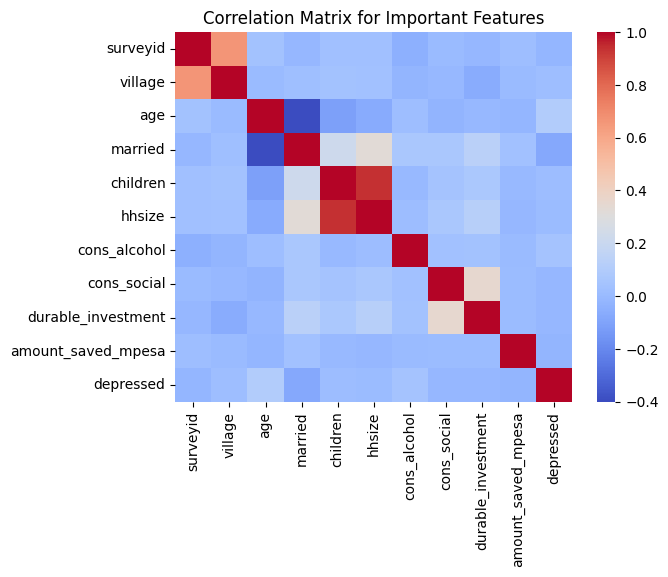

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the list of important columns
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)

# Show the plot
plt.title("Correlation Matrix for Important Features")
plt.show()




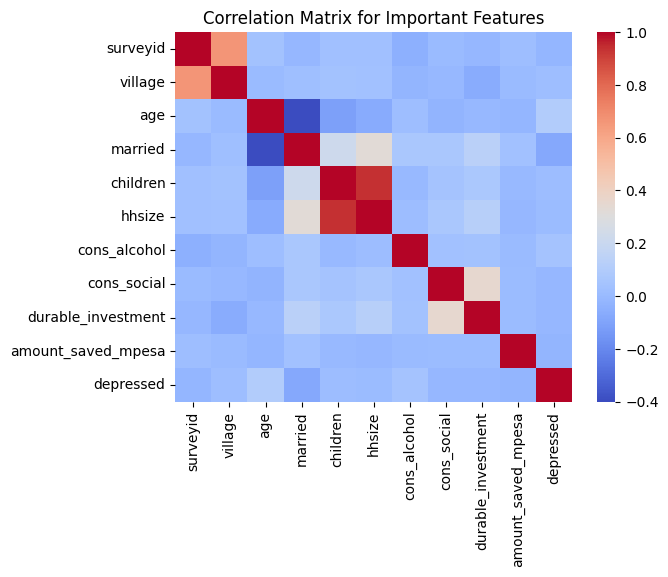

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Get the list of important columns
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'age', 'cons_alcohol', 'village', 'surveyid', 'depressed']

# Read the train CSV into a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)

# Create a correlation matrix
correlation_matrix = df_train.corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)

# Show the plot without values within
plt.title("Correlation Matrix for Important Features")
plt.show()





In [ ]:
import pandas as pd



# Get the list of important columns
important_columns = ['cons_social', 'durable_investment', 'hhsize', 'children', 'married', 'amount_saved_mpesa', 'cons_alcohol','depressed']

# Read the train and test data into Pandas DataFrames
df_train = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/train.csv', usecols=important_columns)
df_test = pd.read_csv('/content/drive/MyDrive/Busara Mental Health/test.csv', usecols=important_columns)



# Handle NaN values
df_train.fillna(value=0, inplace=True)
df_test.fillna(value=0, inplace=True)

# Replace the string value with NaN
df_test['cons_alcohol'].replace('.d', np.NAN, inplace=True)



Accuracy: 0.8811188811188811
Precision: 0.0
Recall: 0.0
F1-score: 0.0


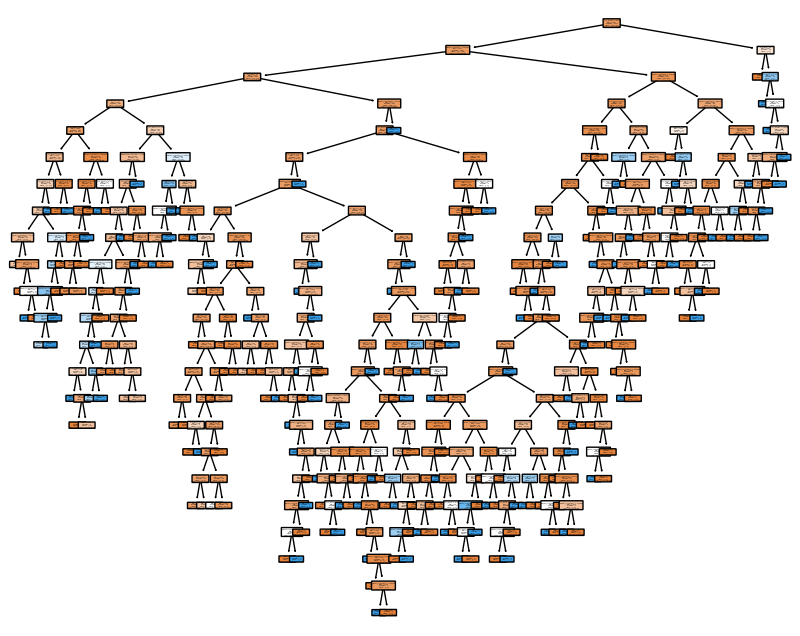

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

# Separate features and labels
X_train = df_train.drop('depressed', axis=1)
y_train = df_train['depressed']
X_test = df_test.drop('depressed', axis=1)
y_test = df_test['depressed']

# Create the decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
dtc_pred = model.predict(X_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy_val = accuracy_score(y_test, dtc_pred)  # Changed variable name to avoid conflict
precision_val = precision_score(y_test, dtc_pred)  # Changed variable name to avoid conflict
recall_val = recall_score(y_test, dtc_pred)  # Changed variable name to avoid conflict
f1_score_val = f1_score(y_test, dtc_pred)  # Changed variable name to avoid conflict

# Print the metrics
print('Accuracy:', accuracy_val)
print('Precision:', precision_val)
print('Recall:', recall_val)
print('F1-score:', f1_score_val)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(
    model,
    feature_names=X_train.columns,
    class_names=['Not Depressed', 'Depressed'],
    rounded=True,
    filled=True
)
plt.show()



Model_1 Accuracy: 0.9230769230769231
Model_1 Precision: 0.0
Model_1 Recall: 0.0
Model_1 F1-score: 0.0


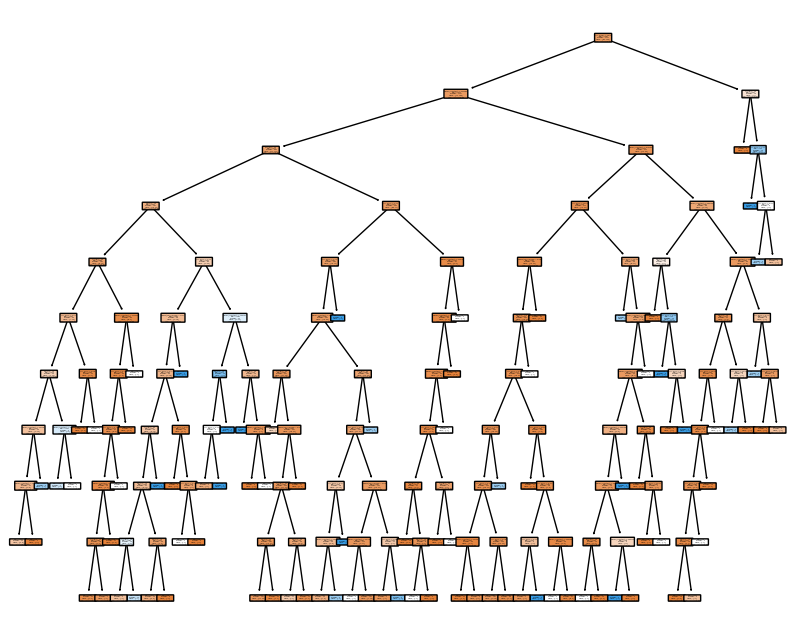

In [ ]:
# Create the second decision tree model with specified hyperparameters
model_1 = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Train the second model
model_1.fit(X_train, y_train)

# Make predictions with the second model
dtc_pred_1 = model_1.predict(X_test)

# Calculate the accuracy, precision, recall, and F1-score for the second model
accuracy_val_1 = accuracy_score(y_test, dtc_pred_1)
precision_val_1 = precision_score(y_test, dtc_pred_1)
recall_val_1 = recall_score(y_test, dtc_pred_1)
f1_score_val_1 = f1_score(y_test, dtc_pred_1)

# Print the metrics for the second model
print('Model_1 Accuracy:', accuracy_val_1)
print('Model_1 Precision:', precision_val_1)
print('Model_1 Recall:', recall_val_1)
print('Model_1 F1-score:', f1_score_val_1)

# Plot the decision tree for the second model
plt.figure(figsize=(10, 8))
plot_tree(
    model_1,
    feature_names=X_train.columns,
    class_names=['Not Depressed', 'Depressed'],
    rounded=True,
    filled=True
)
plt.show()


Model_2 Accuracy: 0.993006993006993
Model_2 Precision: 0.0
Model_2 Recall: 0.0
Model_2 F1-score: 0.0


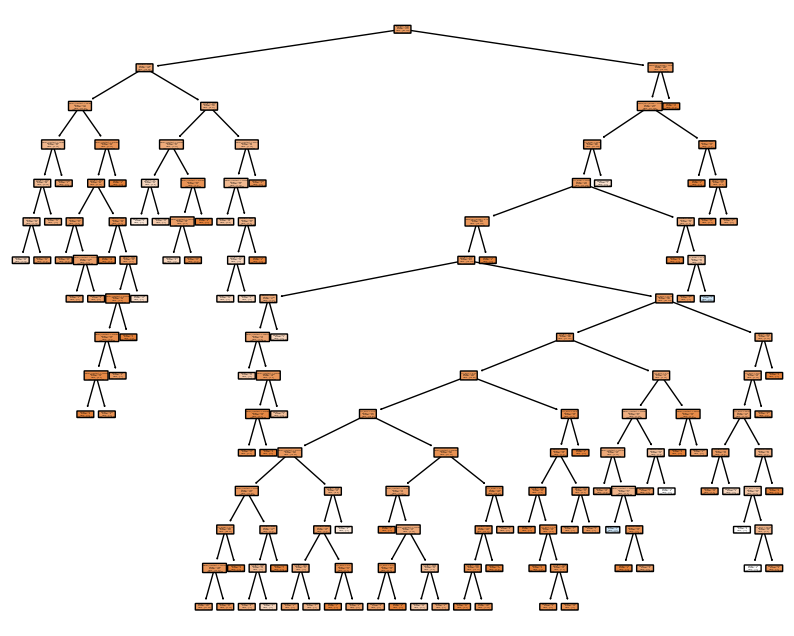

In [ ]:
# Create the third decision tree model with specified hyperparameters
model_2 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=15, min_samples_split=10, min_samples_leaf=5)

# Train the third model
model_2.fit(X_train, y_train)

# Make predictions with the third model
dtc_pred_2 = model_2.predict(X_test)

# Calculate the accuracy, precision, recall, and F1-score for the third model
accuracy_val_2 = accuracy_score(y_test, dtc_pred_2)
precision_val_2 = precision_score(y_test, dtc_pred_2)
recall_val_2 = recall_score(y_test, dtc_pred_2)
f1_score_val_2 = f1_score(y_test, dtc_pred_2)

# Print the metrics for the third model
print('Model_2 Accuracy:', accuracy_val_2)
print('Model_2 Precision:', precision_val_2)
print('Model_2 Recall:', recall_val_2)
print('Model_2 F1-score:', f1_score_val_2)

# Plot the decision tree for the third model
plt.figure(figsize=(10, 8))
plot_tree(
    model_2,
    feature_names=X_train.columns,
    class_names=['Not Depressed', 'Depressed'],
    rounded=True,
    filled=True
)
plt.show()



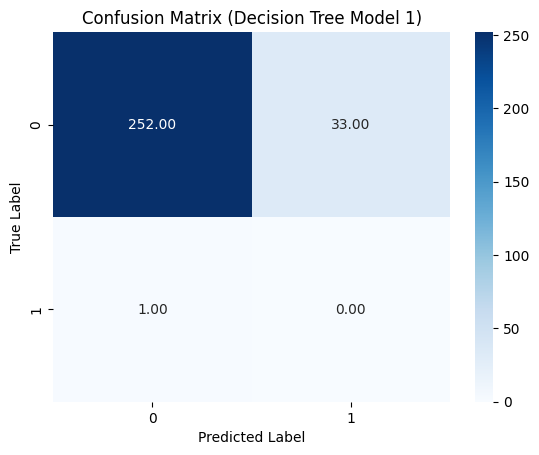

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm_dtc = confusion_matrix(df_test['depressed'], dtc_pred)

# Plot the confusion matrix
sns.heatmap(cm_dtc, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Decision Tree Model 1)')
plt.show()


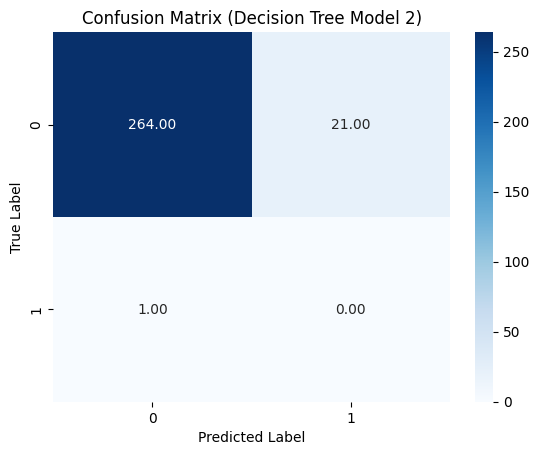

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm_dtc_1 = confusion_matrix(df_test['depressed'], dtc_pred_1)

# Plot the confusion matrix
sns.heatmap(cm_dtc_1, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Decision Tree Model 2)')
plt.show()


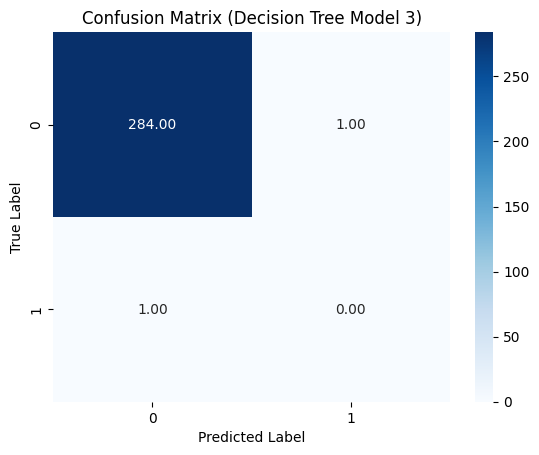

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm_dtc_2 = confusion_matrix(df_test['depressed'], dtc_pred_2)

# Plot the confusion matrix
sns.heatmap(cm_dtc_2, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Decision Tree Model 3)')
plt.show()


Accuracy: 0.7336244541484717
Precision: 0.17647058823529413
Recall: 0.15384615384615385
F1-score: 0.1643835616438356


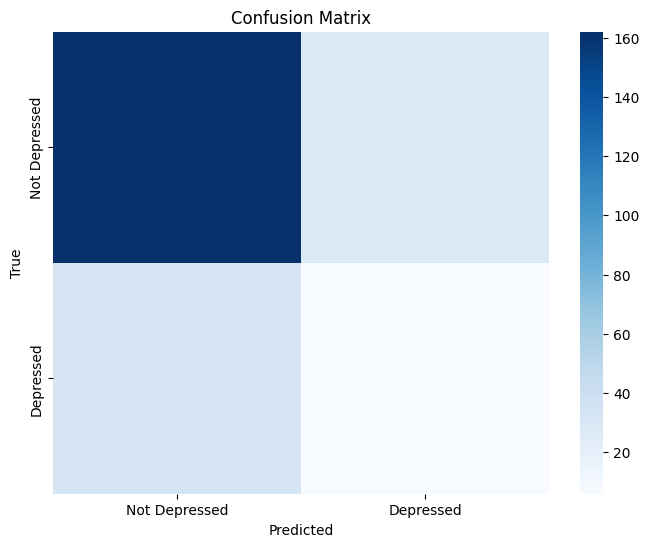

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your full dataset and it has been preprocessed
X = df.drop('depressed', axis=1)
y = df['depressed']

# Handling NaN values by replacing them with the mean of the respective columns
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create the random forest classifier model
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Setting up randomized search to find optimal hyperparameters
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=50, cv=2, scoring='f1', n_jobs=-1)
random_search.fit(X_train, y_train)

# Using the best estimator found by random search to make predictions
best_model = random_search.best_estimator_
rfc_pred = best_model.predict(X_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy_rfc = accuracy_score(y_test, rfc_pred)
precision_rfc = precision_score(y_test, rfc_pred)
recall_rfc = recall_score(y_test, rfc_pred)
f1_score_rfc = f1_score(y_test, rfc_pred)

# Print the metrics
print('Accuracy:', accuracy_rfc)
print('Precision:', precision_rfc)
print('Recall:', recall_rfc)
print('F1-score:', f1_score_rfc)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, rfc_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, cmap='Blues',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.7132867132867133
Precision: 0.012048192771084338
Recall: 1.0
F1-score: 0.02380952380952381


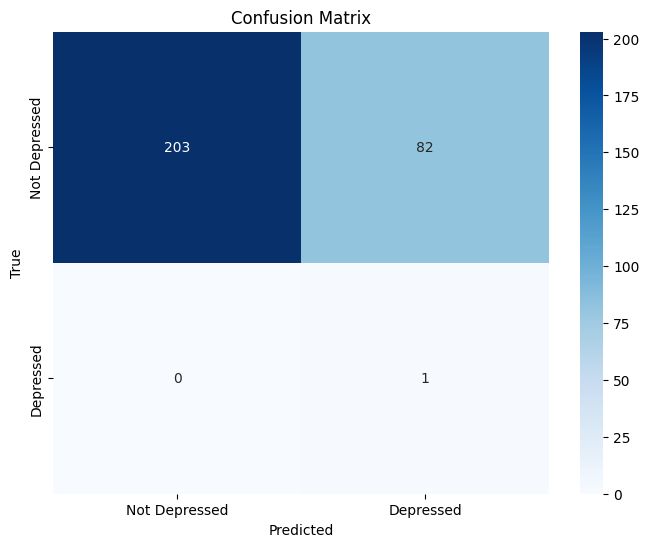

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features and target variable in the training set
X_train = df_train.drop('depressed', axis=1)
y_train = df_train['depressed']

# Separate features and target variable in the test set
X_test = df_test.drop('depressed', axis=1)
y_test = df_test['depressed']

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the logistic regression model with balanced class weights
model = LogisticRegression(max_iter=100000, penalty='l2', C=1.0, class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
lr_pred = model.predict(X_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, lr_pred)
precision = precision_score(y_test, lr_pred, zero_division=1)
recall = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred, zero_division=1)

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, lr_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.951048951048951
Precision: 0.0
Recall: 0.0
F1-score: 0.0


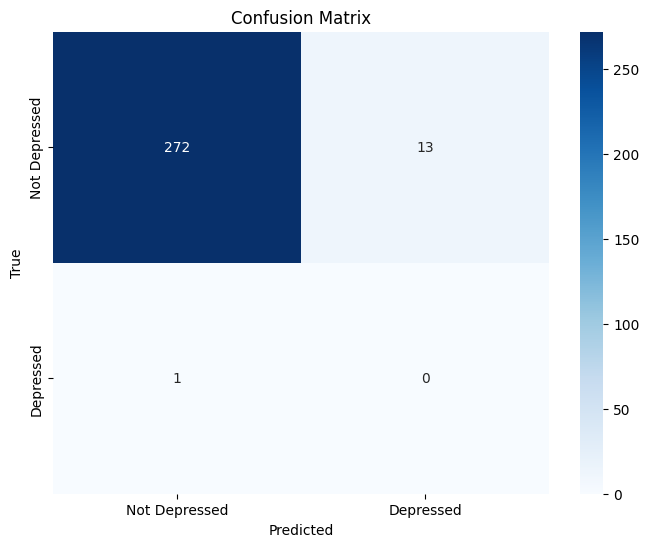

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features and target variable in the training set
X_train = df_train.drop('depressed', axis=1)
y_train = df_train['depressed']

# Separate features and target variable in the test set
X_test = df_test.drop('depressed', axis=1)
y_test = df_test['depressed']

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the Naive Bayes model with adjusted class priors
model = GaussianNB(var_smoothing=1e-9)  # Consider tuning the var_smoothing parameter

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
GNB_pred = model.predict(X_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, GNB_pred)
precision = precision_score(y_test, GNB_pred, zero_division=1)
recall = recall_score(y_test, GNB_pred)
f1 = f1_score(y_test, GNB_pred, zero_division=1)

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, GNB_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.0944055944055944
Precision: 0.0038461538461538464
Recall: 1.0
F1-score: 0.007662835249042146
ROC-AUC: 0.5456140350877192


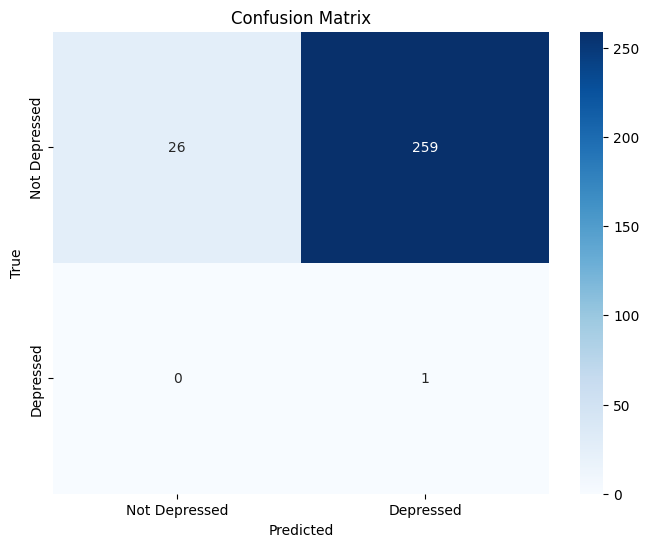

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Separate the minority and majority classes
df_majority = df_train[df_train.depressed==0]
df_minority = df_train[df_train.depressed==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_train_balanced = pd.concat([df_majority, df_minority_upsampled])

# Separate features and target variable in the balanced training set
X_train = df_train_balanced.drop('depressed', axis=1)
y_train = df_train_balanced['depressed']

# Separate features and target variable in the test set
X_test = df_test.drop('depressed', axis=1)
y_test = df_test['depressed']

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the Naive Bayes model
model = GaussianNB(var_smoothing=1e-9)  # Consider tuning the var_smoothing parameter

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
GNB_pred = model.predict(X_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, GNB_pred)
precision = precision_score(y_test, GNB_pred, zero_division=1)
recall = recall_score(y_test, GNB_pred)
f1 = f1_score(y_test, GNB_pred, zero_division=1)
roc_auc = roc_auc_score(y_test, GNB_pred)

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('ROC-AUC:', roc_auc)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, GNB_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Specify the path in your Google Drive to save the output file
output_file_path = "/content/drive/My Drive/output.txt"

# Save the metrics to the output file in Google Drive
with open(output_file_path, 'w') as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"Recall: {recall}\n")
    f.write(f"F1-score: {f1}\n")

